<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## ***DATA SCIENCE / SECTION 4 / SPRINT 2 / NOTE 3***

---

# 언어 모델과 RNN(Recurrent Neural Network, 순환 신경망)

## 🏆 학습 목표

- 언어 모델 (Language Model)
    - 통계 기반 언어모델을 이해하고 설명할 수 있습니다.
    - 통계 기반 언어모델의 한계를 이해하고 이를 극복하기 위해 등장한 신경망 언어 모델의 장점을 설명할 수 있습니다. 

- 순환 신경망 (Recurrent Neural Network, RNN)
    - RNN의 구조와 작동 방식을 이해하고 설명할 수 있습니다.
    - RNN의 장점과 단점을 설명하고 이해할 수 있습니다.

- LSTM & GRU
    - LSTM과 GRU가 고안된 배경과 구조를 연관지어 설명할 수 있습니다.
    - 두 방법의 차이에 대해서 설명할 수 있습니다.

- Attention
    - Attention이 탄생하게 된 배경에 대해서 설명할 수 있습니다.
    - Attention의 장점에 대해서 설명하고 Attention 으로도 해결할 수 없는 RNN의 구조적 단점에 대해서도 이해할 수 있습니다.

## Warm up

- [RNN 소개 영상](https://youtu.be/PahF2hZM6cs)

- [LSTM 소개 영상](https://youtu.be/bX6GLbpw-A4)

- [Seq2Seq 구조와 Attention 소개 영상](https://youtu.be/WsQLdu2JMgI)

## 1. 언어 모델 (Language Model)

### 1) 언어 모델(Language Model)이란?

언어 모델이란 문장과 같은 단어 시퀀스에서 각 단어의 확률을 계산하는 모델입니다.<br/>
이전 시간에 배운 **`Word2Vec`** 역시 여러 가지 언어 모델 중 하나입니다.<br/>
**`CBoW`** 에서는 주변 단어의 정보를 바탕으로 타겟 단어의 확률을 할당했습니다.

익숙하지 않을 수 있겠지만 수식으로 먼저 생각해보겠습니다.<br/>
$l$개의 단어로 구성된 문장은 아래와 같이 나타낼 수 있겠습니다.

> $w_1, w_2, w_3, ..., w_l$

`CBoW`가 타겟 단어(target word)를 예측할 확률 $P(w_t)$ 은 아래와 같이 구해집니다.

> $P(w_t \vert w_{t-2},w_{t-1},w_{t+1},w_{t+2})$

`Word2Vec` 이 나오기 전까지 많은 언어 모델은 목표 단어 왼쪽의 단어만을 고려하여 확률을 계산하였습니다.<br/>
$t$ 번째로 단어를 예측하기 위해서 0번째 부터 $t-1$ 번째 까지의 모든 단어 정보를 사용합니다.

언어 모델이 목표 단어 왼쪽의 단어만을 고려할 때 문장에서 $t$ 번째에 해당하는 단어를 예측할 확률은 아래와 같이 나타낼 수 있습니다.

> $P(w_t \vert w_{t-1},w_{t-2}, \cdots ,w_1,w_0)$

$l$ 개의 단어로 이루어진 문장이 만들어질 확률은 아래 식과 같아집니다.

> $P(w_0,w_1, \cdots, w_{l-1}, w_l) = P(w_0)P(w_1 \vert w_0) \cdots P(w_{l-1} \vert w_{l-2}, \cdots, w_1, w_0)P(w_l \vert w_{l-1}, w_{l-2}, \cdots, w_1, w_0)$

수식이 익숙하지 않을 수 있으니 예시로 한 번 더 살펴보겠습니다.

위 언어 모델을 사용하여 "I am a student" 라는 문장이 만들어질 확률을 구하면 아래와 같습니다.

> $P(\text{"I","am","a","student"}) = P(\text{"I"}) \times P(\text{"am"} \vert \text{"I"}) \times P(\text{"a"} \vert \text{"I","am"}) \times P(\text{"student"} \vert \text{"I","am","a"})$

앞 단어 들이 등장했을 때 특정 단어가 등장할 확률을 조건부 확률로 구하게 됩니다.<br/>
언어 모델을 잘 나타내는 영상 하나 보고 가도록 하겠습니다. 

In [ ]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/9GTr4rqlRyw?start=180&end=200" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

### 2) 통계적 언어 모델 (Statistical Language Model, SLM)

통계적 언어 모델은 신경망 언어 모델이 주목받기 전부터 연구되어 온 전통적인 접근 방식입니다.


- **통계적 언어 모델의 확률 계산**

통계적 언어 모델에서는 단어의 등장 횟수를 바탕으로 조건부 확률을 계산합니다.

다시 _"I am a student"_ 라는 문장을 만드는 예시를 생각해보겠습니다.

> $P(\text{"I","am","a","student"}) = P(\text{"I"}) \times P(\text{"am"} \vert \text{"I"}) \times P(\text{"a"} \vert \text{"I","am"}) \times P(\text{"student"} \vert \text{"I","am","a"})$

첫 번째 항인 $P(\text{"I"})$ 를 구해봅시다. <br/> 전체 말뭉치의 문장 중에서 시작할 때 _"I"_ 로 시작하는 문장의 횟수를 구합니다. 전체 말뭉치의 문장이 1000개이고, 그 중 _"I"_ 로 시작하는 문장이 100개라면

> $$P(\text{"I"}) = \frac{100}{1000} = \frac{1}{10}$$

다음으로, _"I"_ 로 시작하는 100개의 문장 중 바로 다음에 _"am"_ 이 등장하는 문장이 50개라면 

> $$P(\text{"am"} \vert \text{"I"}) = \frac{50}{100} = \frac{1}{2}$$

이런 방식으로 모든 조건부 확률을 구한 뒤 서로를 곱해주면 문장이 등장할 확률 $P(\text{"I","am","a","student"})$ 을 구할 수 있습니다.

- **통계적 언어 모델의 한계점**

통계적 언어 모델은 횟수 기반으로 확률을 계산하기 때문에 희소성(Sparsity) 문제를 가지고 있습니다. 예를 들어, 학습시킬 말뭉치에 _"1 times", "2 times", ..._ 라는 표현은 등장하지만 _"7 times"_ 라는 표현은 없다고 해보겠습니다.

그렇다면 이 말뭉치를 학습한 통계적 언어 모델은 아래와 같은 문장을 절대 만들어 낼 수 없게 됩니다.

> "I studied this section 7 times"

_"7"_ 이라는 단어가 등장한 순간 바로 다음 _"times"_ 가 등장할 확률은 0이 되어버리기 때문입니다.<br/>
이렇게 실제로 사용되는 표현임에도 말뭉치에 등장하지 않았다는 이유로 많은 문장이 등장하지 못하게 되는 문제를 희소 문제라고 합니다.<br/>
통계적 언어 모델에서 이런 문제를 개선하기 위해서 N-gram 이나 스무딩(smoothing), 백오프(back-off)와 같은 방법이 고안되었습니다.

> ❓ **더 알아보기** <br/>
> 1. N-gram : 통계적 언어 모델을 고도화 하기 위한 방법 중 하나인 N-gram에 대해 조사해봅시다.<br/>
> 2. Back-off, Smoothing : 희소 문제를 보완하기 위한 장치인 back-off 와 smoothing에 대해 알아봅시다.





### 3) 신경망 언어 모델 (Neural Langauge Model)

신경망 언어 모델에서는 횟수 기반 대신 `Word2Vec`이나 `fastText` 등의 출력값인 임베딩 벡터를 사용합니다. <br/>
그렇기 때문에 말뭉치에 등장하지 않더라도 의미적, 문법적으로 유사한 단어라면 선택될 수 있습니다.

임베딩 벡터에서는 _"7"_ 이라는 단어의 벡터가 _"1", "2" ..._ 등의 단어와 유사한 곳에 위치합니다. <br/> 그렇기 때문에 말뭉치에 _"7 times"_ 라는 표현이 등장하지 않더라도 _"1 times", "2 times"_ 라는 표현이 등장한다면 언어 모델은

> "I studied this section 7 times"

라는 문장을 만들어 낼 수 있게 됩니다.

## 2. 순환 신경망 (RNN, Recurrent Neural Network)

인공 신경망 언어 모델에서 사용되는 순환 신경망에 대해 알아보겠습니다.

### 연속형 데이터 (Sequential Data)

- Sequential Data란?
    - 어떤 순서로 오느냐에 따라서 단위의 의미가 달라지는 데이터
    - **Non-sequential Data**

    <img src="https://www.researchgate.net/profile/Kent-Wittenburg/publication/303542822/figure/tbl1/AS:614026883117086@1523406825823/Tabular-data-used-in-examples.png" width="280"/> <img src="https://i.imgur.com/phjsn70.jpg" width="500"/>

    - **Sequential Data**

    <img src="https://pbs.twimg.com/media/CxJMPgPUsAAcaRQ?format=jpg&name=small" width="400"/> <img src="https://discourse.metabase.com/uploads/default/optimized/2X/1/1391161139879b2a39d3f7f5f013549776769c68_2_690x411.png" width="400"/>

RNN 은 연속형(Sequential) 데이터를 잘 처리하기 위해 고안된 신경망입니다.<br/>
RNN의 구조에 대해 알아보도록 하겠습니다.


### RNN의 구조

<img src="https://www.easy-tensorflow.com/images/NN/01.png"/>

등호 왼쪽을 보면 3개의 화살표가 있습니다.

1. 입력 벡터가 은닉층에 들어가는 것을 나타내는 화살표
2. 은닉층로부터 출력 벡터가 생성되는 것을 나타내는 화살표
3. 은닉층에서 나와 다시 은닉층으로 입력되는 것을 나타내는 화살표.

3번 화살표는 기존 신경망에서는 없었던 과정입니다.<br/>
이 화살표는 특정 시점에서의 은닉 벡터가 다음 시점의 입력 벡터로 다시 들어가는 과정을 나타내고 있습니다.<br/>
출력 벡터가 다시 입력되는 특성 때문에 **'순환(Recurrent) 신경망'** 이라는 이름이 붙었습니다.

### time-step 별로 펼쳐서 RNN 알아보기



기본 네트워크가 왼쪽 그림처럼 표시되지만 신경망을 시점에 따라 펼쳐보면 오른쪽 그림처럼 나타낼 수 있습니다.<br/>
$t-1$ 시점에서는 $x_{t-1}$ 와 $h_{t-2}$가 입력되고 $o_{t-1}$ 이 출력됩니다.<br/>
$t$ 시점에서는 $x_t$ 와 $h_{t-1}$ 가 입력되고 $o_t$ 이 출력됩니다.<br/>
$t+1$ 시점에서는 $x_{t+1}$ 와 $h_t$ 가 입력되고 $o_{t+1}$ 이 출력됩니다.

t 시점의 RNN 계층은 그 계층으로의 입력 벡터 $x_t$ 와 1개 전의 RNN 계층의 출력 벡터 $h_{t-1}$ 를 받아들입니다.<br/>
입력된 두 벡터를 바탕으로 해당 시점에서의 출력을 아래와 같이 계산합니다. 

> $h_t = \tanh(h_{t-1}W_h + x_tW_x + b)$

가중치는 $W_h, W_x$ 2개가 있습니다.<br/>
각각 입력 x를 h로 변환하기 위한 $W_x$와 RNN의 은닉층의 출력을 다음 h로 변환해주는 $W_h$ 입니다.<br/>
b는 각 편향(bias)을 단순화하여 나타낸 항입니다.

이 과정을 그림으로 나타내면 다음과 같습니다.


<img src="https://i.imgur.com/nFMF0Nc.png" width="900"/>

이렇게 하면 t 시점에 생성되는 hidden-state 벡터인 $h_t$ 는 해당 시점까지 입력된 벡터 $x_1, x_2, \cdots, x_{t-1}, x_t$ 의 정보를 모두 가지고 있습니다.<br/>
Sequential 데이터의 순서 정보를 모두 기억하기 때문에 Sequential 데이터를 다룰 때 RNN을 많이 사용합니다.

In [ ]:
# 배웠던 RNN을 간단한 코드로 살펴보면 다음과 같습니다. 
import numpy as np

class RNN:
  def __init__(self, Wx, Wh, b):
    self.params = [Wx, Wh, b]
    # 필요한 가중치를 초기화하여 줍니다.
    self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
    self.cache = None

  def forward(self, x, h_prev):
    Wx, Wh, b = self.params
    t = np.matmul(h_prev, Wh) + np.matmul(x, Wx) + b
    h_next = np.tanh(t)

    self.cache = (x, h_prev, h_next)
    return h_next

### 다양한 형태의 RNN

실제로 다양한 형태의 RNN이 있습니다. 아래 그림에서 가장 왼쪽에 위치한 one-to-one은 실질적으로 순환이 적용되지는 않은 형태입니다.<br/>
나머지 4개의 RNN이 각각 어떤 분야에 사용되는지 알아보겠습니다.

<img src="http://karpathy.github.io/assets/rnn/diags.jpeg" width="900"/>

1. one-to-many : 1개의 벡터를 받아 Sequential한 벡터를 반환합니다. 이미지를 입력받아 이를 설명하는 문장을 만들어내는 **이미지 캡셔닝(Image captioning)**에 사용됩니다.
2. many-to-one : Sequential 벡터를 받아 1개의 벡터를 반환합니다. 문장이 긍정인지 부정인지를 판단하는 **감성 분석(Sentiment analysis)**에 사용됩니다.
3. many-to-many(1) : Sequential 벡터를 모두 입력받은 뒤 Sequential 벡터를 출력합니다. **시퀀스-투-시퀀스(Sequence-to-Sequence, Seq2Seq) 구조**라고도 부릅니다. 번역할 문장을 입력받아 번역된 문장을 내놓는 **기계 번역(Machine translation)**에 사용됩니다.
4. many-to-many(2) : Sequential 벡터를 입력받는 즉시 Sequential 벡터를 출력합니다. **비디오를 프레임별로 분류(Video classification per frame)**하는 곳에 사용됩니다. 

### RNN의 장점과 단점

- **RNN의 장점**

RNN은 모델이 간단하고 (이론적으로는) 어떤 길이의 sequential 데이터라도 처리할 수 있다는 장점을 가지고 있습니다.

하지만 RNN은 몇 가지 단점을 가지고 있습니다.

- RNN의 단점 1 : **병렬화(parallelization) 불가능**

RNN 구조가 가지고 있는 단점 중 하나는 벡터가 **순차적으로 입력** 된다는 점입니다.<br/>
이는 sequential 데이터 처리를 가능하게 해주는 요인이지만, 이러한 구조는 GPU 연산의 장점인 병렬화를 불가능하게 만듭니다.<br/>
그렇기 때문에 RNN 기반의 모델은 GPU 연산을 하였을 때 이점이 거의 없다는 단점을 가지고 있습니다.


- RNN의 단점 2: **기울기 폭발(Exploding Gradient), 기울기 소실(Vanishing Gradient)**

단순 RNN의 치명적인 문제점은 역전파 과정에서 발생합니다.<br/>
역전파 과정에서 RNN의 활성화 함수인 $\tanh$ 의 미분값을 전달하게 됩니다. 
$\tanh$ 를 미분한 함수의 값은 아래와 같습니다.

<img src="https://user-images.githubusercontent.com/45377884/91560164-52a14400-e974-11ea-8bf4-bbfc7fd42deb.png" width="700"/>

위 그래프에서 최댓값이 1이고, (-4,4) 이외의 범위에서는 거의 0에 가까운 값을 나타내는 것을 알 수 있습니다.

문제는 역전파 과정에서 이 값을 반복해서 곱해주어야 한다는 점입니다.<br/>
이 Recurrent가 10회, 100회 반복된다고 보면, 이 값의 10제곱, 100제곱이 식 내부로 들어가게 됩니다.

만약 이 값이 0.9 일 때 10제곱이 된다면 0.349가 됩니다. 이렇게 되면 시퀀스 앞쪽에 있는 hidden-state 벡터에는 역전파 정보가 거의 전달되지 않게 됩니다.<br/>
이런 문제를 **기울기 소실(Vanishing Gradient)**이라고 합니다.

반대로 이 값이 1.1 이면 10제곱만해도 2.59배로 커지게 됩니다. 이렇게 되면 시퀀스 앞쪽에 있는 hidden-state 벡터에는 역전파 정보가 과하게 전달됩니다.<br/>
이런 문제를 **기울기 폭발(Exploding Gradient)**이라고 합니다.

기울기 정보의 크기가 문제라면,<br/>
"기울기 정보의 크기를 적절하게 조정하여 줄 수 있다면 문제를 해결할 수 있지 않을까?"라는 생각을 해볼 수 있습니다.

이런 아이디어에서 시작하여 고안된 것이 바로 **장단기 기억망(Long-Short Term Memory, LSTM)**입니다.

## 3. LSTM & GRU

### LSTM (Long Term Short Memory, 장단기기억망)

RNN에 **기울기 정보 크기를 조절하기 위한 Gate를 추가한 모델을 LSTM**이라고 합니다.<br/>
요즘에는 단순한 RNN은 사용하지 않고 대부분 LSTM을 사용합니다.

RNN이라고 하면 당연히 LSTM이나 이후에 배울 GRU를 지칭할 정도로<br/>
LSTM은 Sequential 데이터를 처리하기 위한 대표적인 모델이 되었습니다.<br/>
오히려 전에 배운 RNN을 `기본적인 RNN(Vanilla RNN)`이라고 따로 구별하여 표현하기도 합니다.

- **LSTM의 구조**

먼저, 아래 그림을 통해 LSTM 셀 하나의 구조를 알아보겠습니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile5.uf.tistory.com%2Fimage%2F9905CF385BD5F5EC027F20" width="700"/>

RNN의 셀 구조보다 뭔가 상당히 복잡해진 것을 확인할 수 있습니다.

위에서 살펴본 것처럼 LSTM이 등장한 배경은 [기울기 소실(Vanishing gradient)](https://en.wikipedia.org/wiki/Vanishing_gradient_problem) 문제를 해결하기 위함이었습니다.

LSTM은 기울기 소실 문제를 해결하기 위해 3가지 게이트(gate)를 추가하였습니다. 각 게이트는 다음과 같은 역할을 합니다.

1. forget gate ($f_t$): 과거 정보를 얼마나 유지할 것인가?
2. input gate ($i_t$) : 새로 입력된 정보는 얼마만큼 활용할 것인가?
3. output gate ($o_t$) : 두 정보를 계산하여 나온 출력 정보를 얼마만큼 넘겨줄 것인가?

hidden-state 말고도 활성화 함수를 직접 거치지 않는 상태인 cell-state 가 추가되었습니다.<br/>
cell-state는 역전파 과정에서 활성화 함수를 거치지 않아 정보 손실이 없기 때문에<br/>
**뒷쪽 시퀀스의 정보에 비중을 결정할 수 있으면서 동시에 앞쪽 시퀀스의 정보를 완전히 잃지 않을 수 있습니다.**

- **LSTM의 역전파**

*(다소 복잡하므로 당장은 LSTM의 역전파 과정을 전부 다 이해하려 하지 않아도 괜찮습니다!)*

<img src="http://i.imgur.com/2BZtc2l.gif" width="700"/>

- **LSTM의 사용**

LSTM은 실제로 굉장히 많은 곳에 사용됩니다.

여러 언어 모델에서 LSTM을 사용하고 있습니다.<br/>
Gate가 적용되지 않은 RNN, 즉 Vanilla RNN은 10~20 단어로 이루어진 문장에 대한 분류/생성/번역 등의 성능이 매우 낮습니다.<br/>
Vanilla RNN이 가지고 있는 기울기 소실/폭발 문제 때문입니다.

언어 모델 뿐만 아니라 신경망을 활용한 시계열 알고리즘에는 대부분 LSTM을 사용하고 있습니다.

### GRU (Gated Recurrent Unit)

한편, 이 LSTM의 간소한 버전인 GRU도 가볍게 소개하겠습니다.<br/>
그림을 통해 GRU 셀의 구조를 살펴보겠습니다.


<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile7.uf.tistory.com%2Fimage%2F99F0EC3E5BD5F6460255CF"/>

- **GRU 셀의 특징**

1. LSTM에서 있었던 cell-state가 사라졌습니다.<br/>
cell-state 벡터 $c_t$ ​와 hidden-state 벡터 $h_t$​가 하나의 벡터 $h_t$​로 통일되었습니다.

2. 하나의 Gate $z_t$가 forget, input gate를 모두 제어합니다.<br/>
$z_t$가 1이면 forget 게이트가 열리고, input 게이트가 닫히게 되는 것과 같은 효과를 나타냅니다.<br/>
반대로 $z_t$가 0이면 input 게이트만 열리는 것과 같은 효과를 나타냅니다.

3. GRU 셀에서는 output 게이트가 없어졌습니다.<br/>
대신에 전체 상태 벡터 $h_t$ 가 각 time-step에서 출력되며, 이전 상태의 $h_{t-1}$ 의 어느 부분이 출력될 지 새롭게 제어하는 Gate인 $r_t$ 가 추가되었습니다.

### LSTM 코드 실습

이제부터 TensorFlow와 Keras를 사용하여 자연어로 RNN을 훈련시켜 보겠습니다.

아래는 간단한 LSTM을 사용하여 텍스트 감성 분석을 수행하는 `Tensorflow` 튜토리얼 코드입니다.

- **Keras를 이용한 RNN/LSTM 텍스트 감정 분류(Sentiment classification)**

IMDB 영화 리뷰 데이터에 LSTM을 적용하여 감성 분석 태스크를 수행해봅시다.

In [ ]:
from __future__ import print_function

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

# 파라미터를 설정합니다.
max_features = 20000
maxlen = 80
batch_size = 32

# 데이터를 불러옵니다.
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


25000 train sequences
25000 test sequences


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
# Sequence를 Padding 하여줍니다.
print('Pad Sequences (samples x maxlen)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)

Pad Sequences (samples x time)
x_train shape:  (25000, 80)
x_test shape:  (25000, 80)


In [ ]:
x_train[0]

array([   15,   256,     4,     2,     7,  3766,     5,   723,    36,
          71,    43,   530,   476,    26,   400,   317,    46,     7,
           4, 12118,  1029,    13,   104,    88,     4,   381,    15,
         297,    98,    32,  2071,    56,    26,   141,     6,   194,
        7486,    18,     4,   226,    22,    21,   134,   476,    26,
         480,     5,   144,    30,  5535,    18,    51,    36,    28,
         224,    92,    25,   104,     4,   226,    65,    16,    38,
        1334,    88,    12,    16,   283,     5,    16,  4472,   113,
         103,    32,    15,    16,  5345,    19,   178,    32],
      dtype=int32)

In [ ]:
import tensorflow as tf

# model을 정의합니다.
"""
keras의 기본 Embedding 벡터를 사용하였으며
LSTM 층에 dropout/recurrent_dropout을 적용하였습니다.
"""
model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(max_features, 128),
  tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


> ❓ 공식 문서를 통해 Dropout / Recurrent Dropout 의 차이를 조사해보세요.

In [ ]:
unicorns = model.fit(x_train, y_train,
          batch_size=batch_size, 
          epochs=3, 
          validation_data=(x_test,y_test))

Epoch 1/3
782/782 [==============================] - 155s 195ms/step - loss: 0.4287 - accuracy: 0.7973 - val_loss: 0.3605 - val_accuracy: 0.8402
Epoch 2/3
782/782 [==============================] - 152s 194ms/step - loss: 0.2566 - accuracy: 0.8985 - val_loss: 0.4096 - val_accuracy: 0.8314
Epoch 3/3
782/782 [==============================] - 152s 195ms/step - loss: 0.1684 - accuracy: 0.9369 - val_loss: 0.4209 - val_accuracy: 0.8296


> ❓ 위 코드의 실행 시간이 MLP(Multi-Layer Perceptron)에 비해 어떠한가요?

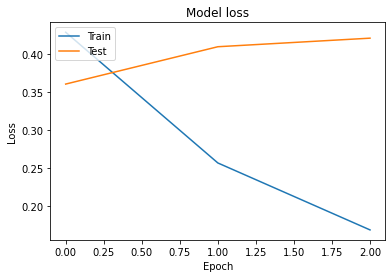

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(unicorns.history['loss'])
plt.plot(unicorns.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

- **Keras를 이용한 LSTM 텍스트 생성기**

LSTM을 사용하면 첫 번째 시간에 소개드렸던 자연어 생성 태스크도 수행할 수 있습니다.

니체(Friedrich Nietzsche)의 글을 학습하여 비슷한 글을 생성해내는 튜토리얼 코드를 실행하여 텍스트 생성 실습을 해보겠습니다.
(주의 : 완료되기까지 시간이 매우 오래 걸립니다.)


In [ ]:
# 라이브러리, 데이터 불러오기
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io

path = get_file(
    'nietzsche.txt',
    origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
with io.open(path, encoding='utf-8') as f:
    text = f.read().lower()
print('corpus length:', len(text))

chars = sorted(list(set(text)))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

614400/600901 [==============================] - 0s 1us/step
corpus length: 600893
total chars: 57


In [ ]:
# max length를 이용하여 문자열의 크기 정렬
maxlen = 40
step = 3

sentences = []
next_chars = []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

print('Vectorization...')

x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

nb sequences: 200285
Vectorization...


In [ ]:
# LSTM 모델을 제작합니다.
print('Build model...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

Build model...


In [ ]:
# sample 문장을 생성하도록 하는 함수입니다.
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


# Epoch가 끝날 때마다 sample 문장을 생성하는 함수입니다.
def on_epoch_end(epoch, _):
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)

    # temperature를 조정하여 단어 선택 시 다양성을 부여합니다.
    """
    https://3months.tistory.com/491, https://stackoverflow.com/questions/58764619/why-should-we-use-temperature-in-softmax
    위 링크들을 참조하여 temperature(diversity) 값이 커질수록
    단어 선택이 어떻게 변할 지에 대해서 알아보도록 합시다.
    """ 
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

(주의 : 아래 셀은 시간이 매우 오래 걸립니다. 실행 시 주의해 주세요.)

In [ ]:
model.fit(x, y,
          batch_size=128,
          epochs=60,
          callbacks=[print_callback])

Epoch 1/60
1565/1565 [==============================] - 125s 79ms/step - loss: 2.2720

----- Generating text after Epoch: 0
----- diversity: 0.2
----- Generating with seed: "th which is
occasionally mingled a sligh"
th which is
occasionally mingled a slight the such a server the such as in the prese the great and and great and sense of the prese the stand the world and the prese the stronger and the world and many one a present of the such a soul and a soul the stand and still the master of the such as in the present and the world and and the such as a sure and in the self the will the prese of the such as in the present of the prese of the such co
----- diversity: 0.5
----- Generating with seed: "th which is
occasionally mingled a sligh"
th which is
occasionally mingled a slight they an the this more they are in the sure and in the pals in the world responss of in the such philosopher hell the world in their self, as a serstaral and world the will not the fame be sure sense of and sti

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


ical sense of the servations of the servations of the servation, and the serve and properation of the serve of the serve and as the same possible the sense--and and the world and as a servaries of the s
----- diversity: 0.5
----- Generating with seed: "alizes, when
in the struggle with danger"
alizes, when
in the struggle with dangerous conscience of the senses seems and interest and distance of the conscience of the greatest that we dream and the conceptions and like the subjection in a most and interrogation, and personality, in the individual and bold, there are there of the strength, and a critical a remain and more every interpreted world, and is subjection in the servationally and commanding and agreeable, and a senses 
----- diversity: 1.0
----- Generating with seed: "alizes, when
in the struggle with danger"
alizes, when
in the struggle with dangerous thrand in e, majechs; it get germery that how in the-laggcal sentiment le ideal account in order to it
beautiful, the
connectes.

## 4. RNN 구조에 Attention 적용하기

### 기존 RNN 기반(LSTM, GRU) 번역 모델의 단점

RNN이 가진 가장 큰 단점 중 하나는 기울기 소실로부터 나타나는 **장기 의존성(Long-term dependency)** 문제입니다.<br/>
장기 의존성 문제란 문장이 길어질 경우 앞 단어의 정보를 잃어버리게 되는 현상입니다.<br/>
장기 의존성 문제를 해결하기 위해 나온 것이 셀 구조를 개선한 LSTM과 GRU입니다.<br/>
기계 번역에서 RNN 기반의 모델(LSTM, GRU)이 단어를 처리하는 방법은 아래와 같다고 할 수 있습니다.

<img src="https://user-images.githubusercontent.com/45377884/86040995-f27b4800-ba7f-11ea-8ca1-67b2517573eb.gif" alt="seq2seq_6" width="800" />

### Attention의 등장

위 구조의 문제는 고정 길이의 hidden-state 벡터에 모든 단어의 의미를 담아야 한다는 점입니다.<br/>
아무리 LSTM, GRU가 장기 의존성 문제를 개선하였더라도 문장이 매우 길어지면(30-50 단어) 모든 단어 정보를 고정 길이의 hidden-state 벡터에 담기 어렵습니다.<br/>
이런 문제를 해결하기 위해서 고안된 방법이 바로 **Attention(어텐션)** 입니다.

<img src="https://user-images.githubusercontent.com/45377884/86040873-b942d800-ba7f-11ea-9f59-ee23923f777e.gif" alt="seq2seq_7" width="800" />

Attention은 각 인코더의 Time-step 마다 생성되는 hidden-state 벡터를 간직합니다.<br/>
입력 단어가 N개라면 N개의 hidden-state 벡터를 모두 간직하게 됩니다.<br/>
모든 단어가 입력되면 생성된 hidden-state 벡터를 모두 디코더에 넘겨줍니다.

디코더는 받은 N개의 hidden-state 벡터를 어떻게 활용할까요?

- **검색 시스템의 아이디어 둘러보기**

잠시 돌아가 검색 시스템에 대해 알아봅시다.<br/>
아래는 구글에서 _"what is attention in nlp"_ 라는 검색어를 구글에 입력했을 때의 검색 결과를 나타낸 이미지입니다.

<img src="https://i.imgur.com/JdCQr1l.png" alt="retrieval_system" width="600" />

그림에서 볼 수 있듯이 검색 시스템은 아래와 같은 3단계를 거쳐 작동합니다.

1. 찾고자 하는 정보에 대한 검색어(Query)를 입력합니다.
2. 검색 엔진은 검색어와 가장 비슷한 키워드(Key)를 찾습니다.
3. 그리고 해당 키워드(Key)와 연결된 페이지(Value)를 보여줍니다.

In [ ]:
# 더 알아보기 : 파이썬의 딕셔너리도 비슷한 형태로 작동합니다.
# Query('a')를 던지면 딕셔너리에서 동일한 Key('a')를 찾은 뒤 Value(123)을 반환합니다.

dict1 = {'a':123, 'b':425, 'c':236, 'd':945}
dict1['a']

123

### 디코더에서 Attention이 동작하는 방법

디코더에서 단어를 생성하는 과정을 알아보겠습니다.

디코더의 각 time-step 마다의 hidden-state 벡터는 쿼리(query)로 작용합니다.<br/>
인코더에서 넘어온 N개의 hidden-state 벡터를 키(key)로 여기고 이들과의 연관성을 계산합니다.<br/>
이 때 계산은 내적(dot-product)을 사용하고 내적의 결과를 Attention 가중치로 사용합니다.<br/>

아래는 디코더 첫 단어 "I"(`Time-step 4`)에 대한 어텐션 가중치가 구해지는 과정입니다.

<img src="https://i.imgur.com/gNcbamV.png" title="source: imgur.com" width="800" /></a>

1. 쿼리(Query)인 디코더의 hidden-state 벡터, 키(Key)인 인코더에서 넘어온 hidden-state 벡터를 준비합니다.
2. 각각의 벡터를 내적한 값을 구합니다.
3. 이 값에 소프트맥스(softmax) 함수를 취해줍니다.
4. 소프트맥스를 취하여 나온 값에 밸류(Value)에 해당하는 인코더에서 넘어온 hidden-state 벡터를 곱해줍니다. 
5. 이 벡터를 모두 더해줍니다. 이 벡터의 성분 중에는 쿼리-키 연관성이 높은 밸류 벡터의 성분이 더 많이 들어있게 됩니다.
6. (그림에는 나와있지 않지만) 최종적으로 5에서 생성된 벡터와 디코더의 hidden-state 벡터를 사용하여 출력 단어를 결정하게 됩니다.

디코더는 인코더에서 넘어온 모든 Hidden state 벡터에 대해 위와 같은 계산을 실시합니다.<br/>
그렇기 때문에 Time-step마다 출력할 단어가 어떤 인코더의 어떤 단어 정보와 연관되어 있는지, 즉 어떤 단어에 **집중(Attention)**할 지를 알 수 있습니다.<br/>
Attention을 활용하면 디코더가 인코더에 입력되는 모든 단어의 정보를 활용할 수 있기 때문에 장기 의존성 문제를 해결할 수 있습니다.

아래는 예시로 제시되었던 문장을 번역(**`Je suis etudiant => I am a student`**)했을 때 각 단어마다의 Attention 스코어를 시각화 한 그림입니다.<br/>

> _"I"_ -> _"Je"_ <br/>
> _"am"_ -> _"suis"_<br/>
> _"a"_ -> _"suis", "etudiant"_<br/>
> _"student"_ -> _"etudiant"_

왼쪽 단어가 생성될 때 오른쪽 단어와 연관되어 있음을 확인할 수 있습니다. 


<img src="https://user-images.githubusercontent.com/45377884/86047018-29a22700-ba89-11ea-98ee-a90b2fb70a23.gif" alt="attn_visualization" width="500" />

### RNN(LSTM) with Attention 코드 실습

`Tensorflow` 튜토리얼 코드를 사용하여 Attention이 어떻게 적용되는 지 알아보도록 하겠습니다.

In [ ]:
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

import unicodedata
import re
import numpy as np
import os
import io
import time

In [ ]:
# 데이터셋을 다운로드합니다.
path_to_zip = tf.keras.utils.get_file(
    'spa-eng.zip', origin='http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip',
    extract=True)

path_to_file = os.path.dirname(path_to_zip)+"/spa-eng/spa.txt"

2646016/2638744 [==============================] - 0s 0us/step


In [ ]:
# 유니코드 파일을 아스키코드로 변환하는 함수입니다.
def unicode_to_ascii(s):
  return ''.join(c for c in unicodedata.normalize('NFD', s)
                 if unicodedata.category(c) != 'Mn')


def preprocess_sentence(w):
  w = unicode_to_ascii(w.lower().strip())

  # creating a space between a word and the punctuation following it
  # eg: "he is a boy." => "he is a boy ."
  # Reference:- https://stackoverflow.com/questions/3645931/python-padding-punctuation-with-white-spaces-keeping-punctuation
  w = re.sub(r"([?.!,¿])", r" \1 ", w)
  w = re.sub(r'[" "]+', " ", w)

  # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
  w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)

  w = w.strip()

  # adding a start and an end token to the sentence
  # so that the model know when to start and stop predicting.
  w = '<start> ' + w + ' <end>'
  return w

In [ ]:
en_sentence = u"May I borrow this book?"
sp_sentence = u"¿Puedo tomar prestado este libro?"
print(preprocess_sentence(en_sentence))
print(preprocess_sentence(sp_sentence).encode('utf-8'))

<start> may i borrow this book ? <end>
b'<start> \xc2\xbf puedo tomar prestado este libro ? <end>'


In [ ]:
# 1. Remove the accents
# 2. Clean the sentences
# 3. Return word pairs in the format: [ENGLISH, SPANISH]
def create_dataset(path, num_examples):
  lines = io.open(path, encoding='UTF-8').read().strip().split('\n')

  word_pairs = [[preprocess_sentence(w) for w in line.split('\t')]
                for line in lines[:num_examples]]

  return zip(*word_pairs)

In [ ]:
en, sp = create_dataset(path_to_file, None)
print(en[-1])
print(sp[-1])

<start> if you want to sound like a native speaker , you must be willing to practice saying the same sentence over and over in the same way that banjo players practice the same phrase over and over until they can play it correctly and at the desired tempo . <end>
<start> si quieres sonar como un hablante nativo , debes estar dispuesto a practicar diciendo la misma frase una y otra vez de la misma manera en que un musico de banjo practica el mismo fraseo una y otra vez hasta que lo puedan tocar correctamente y en el tiempo esperado . <end>


In [ ]:
def tokenize(lang):
  lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
  lang_tokenizer.fit_on_texts(lang)

  tensor = lang_tokenizer.texts_to_sequences(lang)

  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,
                                                         padding='post')

  return tensor, lang_tokenizer

In [ ]:
def load_dataset(path, num_examples=None):
  # creating cleaned input, output pairs
  targ_lang, inp_lang = create_dataset(path, num_examples)

  input_tensor, inp_lang_tokenizer = tokenize(inp_lang)
  target_tensor, targ_lang_tokenizer = tokenize(targ_lang)

  return input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer

In [ ]:
# Try experimenting with the size of that dataset
num_examples = 30000
input_tensor, target_tensor, inp_lang, targ_lang = load_dataset(path_to_file, num_examples)

# Calculate max_length of the target tensors
max_length_targ, max_length_inp = target_tensor.shape[1], input_tensor.shape[1]

In [ ]:
# Creating training and validation sets using an 80-20 split
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

# Show length
print(len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val))

24000 24000 6000 6000


- 구조와 관련된 파라미터 설정하기

In [ ]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(inp_lang.word_index)+1
vocab_tar_size = len(targ_lang.word_index)+1

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([64, 16]), TensorShape([64, 11]))

- 인코더 구현하기

In [ ]:
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state=hidden)
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))

In [ ]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print('Encoder output shape: (batch size, sequence length, units)', sample_output.shape)
print('Encoder Hidden state shape: (batch size, units)', sample_hidden.shape)

Encoder output shape: (batch size, sequence length, units) (64, 16, 1024)
Encoder Hidden state shape: (batch size, units) (64, 1024)


In [ ]:
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # query hidden state shape == (batch_size, hidden size)
    # query_with_time_axis shape == (batch_size, 1, hidden size)
    # values shape == (batch_size, max_len, hidden size)
    # we are doing this to broadcast addition along the time axis to calculate the score
    query_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(query_with_time_axis) + self.W2(values)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units)", attention_result.shape)
print("Attention weights shape: (batch_size, sequence_length, 1)", attention_weights.shape)

Attention result shape: (batch size, units) (64, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (64, 16, 1)


- **디코더 구현**

In [ ]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)

    # used for attention
    self.attention = BahdanauAttention(self.dec_units)

  def call(self, x, hidden, enc_output):
    # enc_output shape == (batch_size, max_length, hidden_size)
    context_vector, attention_weights = self.attention(hidden, enc_output)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # output shape == (batch_size * 1, hidden_size)
    output = tf.reshape(output, (-1, output.shape[2]))

    # output shape == (batch_size, vocab)
    x = self.fc(output)

    return x, state, attention_weights

In [ ]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print('Decoder output shape: (batch_size, vocab size)', sample_decoder_output.shape)

Decoder output shape: (batch_size, vocab size) (64, 4935)


In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,
                                                            reduction='none')


def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [ ]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):
      # passing enc_output to the decoder
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [ ]:
EPOCHS = 10

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
      
  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 4.6026
Epoch 1 Batch 100 Loss 2.1524
Epoch 1 Batch 200 Loss 1.8952
Epoch 1 Batch 300 Loss 1.6539
Epoch 1 Loss 2.0383
Time taken for 1 epoch 1016.7628138065338 sec

Epoch 2 Batch 0 Loss 1.5593
Epoch 2 Batch 100 Loss 1.4487
Epoch 2 Batch 200 Loss 1.2338
Epoch 2 Batch 300 Loss 1.3027
Epoch 2 Loss 1.3807
Time taken for 1 epoch 992.9955353736877 sec

Epoch 3 Batch 0 Loss 1.0330
Epoch 3 Batch 100 Loss 1.0200
Epoch 3 Batch 200 Loss 0.8721
Epoch 3 Batch 300 Loss 0.9157
Epoch 3 Loss 0.9653
Time taken for 1 epoch 989.1491215229034 sec

Epoch 4 Batch 0 Loss 0.6319
Epoch 4 Batch 100 Loss 0.6260
Epoch 4 Batch 200 Loss 0.5699
Epoch 4 Batch 300 Loss 0.7347
Epoch 4 Loss 0.6478
Time taken for 1 epoch 986.2824234962463 sec

Epoch 5 Batch 0 Loss 0.4384
Epoch 5 Batch 100 Loss 0.3671
Epoch 5 Batch 200 Loss 0.4387
Epoch 5 Batch 300 Loss 0.4493
Epoch 5 Loss 0.4406
Time taken for 1 epoch 998.4929230213165 sec

Epoch 6 Batch 0 Loss 0.2667
Epoch 6 Batch 100 Loss 0.2406
Epoch 6 Batch 200 Los

In [ ]:
def evaluate(sentence):
  attention_plot = np.zeros((max_length_targ, max_length_inp))

  sentence = preprocess_sentence(sentence)

  inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
  inputs = tf.convert_to_tensor(inputs)

  result = ''

  hidden = [tf.zeros((1, units))]
  enc_out, enc_hidden = encoder(inputs, hidden)

  dec_hidden = enc_hidden
  dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)

  for t in range(max_length_targ):
    predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                         dec_hidden,
                                                         enc_out)

    # storing the attention weights to plot later on
    attention_weights = tf.reshape(attention_weights, (-1, ))
    attention_plot[t] = attention_weights.numpy()

    predicted_id = tf.argmax(predictions[0]).numpy()

    result += targ_lang.index_word[predicted_id] + ' '

    if targ_lang.index_word[predicted_id] == '<end>':
      return result, sentence, attention_plot

    # the predicted ID is fed back into the model
    dec_input = tf.expand_dims([predicted_id], 0)

  return result, sentence, attention_plot

In [ ]:
# function for plotting the attention weights
def plot_attention(attention, sentence, predicted_sentence):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='viridis')

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  plt.show()

In [ ]:
def translate(sentence):
  result, sentence, attention_plot = evaluate(sentence)

  print('Input: %s' % (sentence))
  print('Predicted translation: {}'.format(result))

  attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
  plot_attention(attention_plot, sentence.split(' '), result.split(' '))

Input: <start> hace mucho frio aqui . <end>
Predicted translation: it s very cold here . <end> 


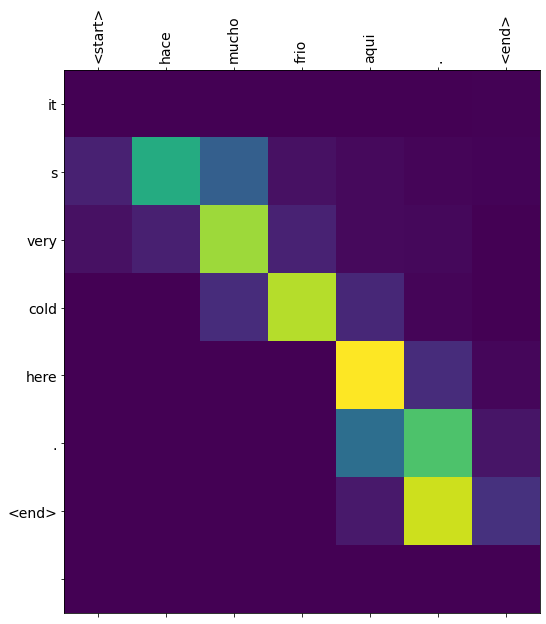

In [ ]:
translate(u'hace mucho frio aqui.')

Input: <start> esta es mi vida . <end>
Predicted translation: this is my life . <end> 


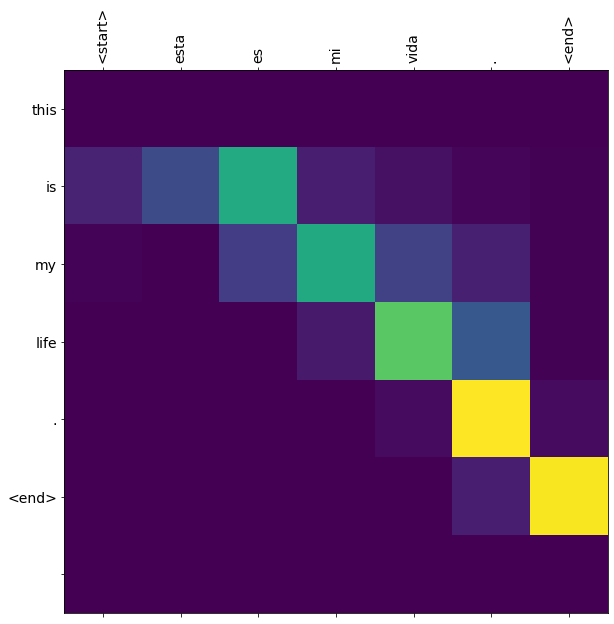

In [ ]:
translate(u'esta es mi vida.')

## Review

- 언어 모델 (Language Model)
    - 통계 기반의 언어 모델(Statistical Language Model)
    - 신경망 언어 모델(Neural Network Language Model) 

- 순환 신경망 (Recurrent Neural Network, RNN)
    - RNN의 구조
    - RNN의 장점과 단점
        - 기울기 소실(Gradient Vanishing)

- LSTM & GRU
    - LSTM
        - Cell state
    - GRU

- Attention
    - Attention
        - 장기 의존성(Long-term Dependency)
    - Query, Key, Vector
        - 어떤 벡터가 각 요소에 해당될까요?